## House Price Prediction

In [1]:
# Import required libraries

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### 1. Import and understand the data

In [2]:
#read data
housing = pd.read_csv("E:\\New folder\\python\\py\\IIITB\\Machine Learning-2\\Advanced Regression\\Assignment\\train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# check shape
housing.shape

(1460, 81)

In [5]:
#check infomation
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# check statistics
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### 2. Dealing with missing values and data cleaning

In [7]:
# check for duplicate also
housing.drop_duplicates()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

<AxesSubplot:>

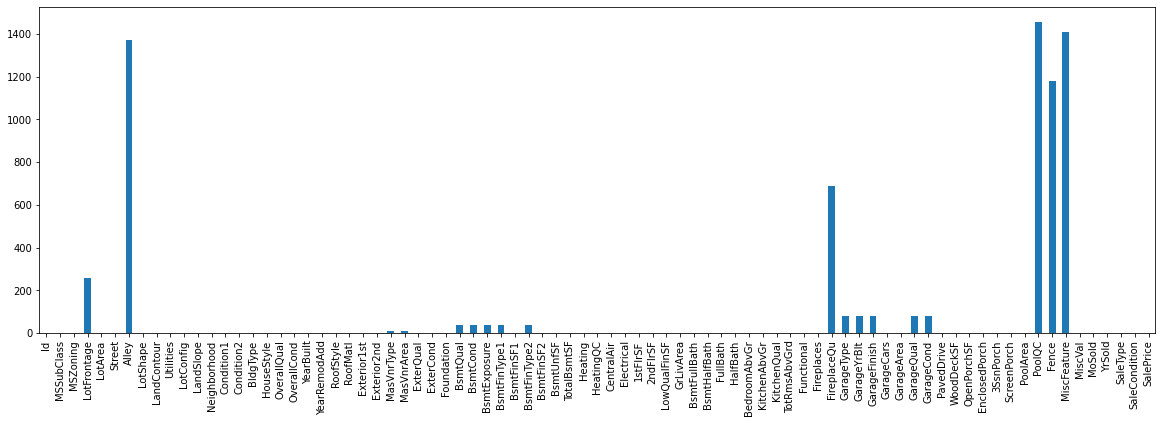

In [8]:
# checking missing values
housing.isnull().sum().plot.bar(figsize=(20,6))

In [9]:
housing.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [10]:
# percentage of missing values
round(housing.isnull().sum()/housing.shape[0]*100,2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
dtype: float64

In [11]:
# Lets drop variables having more than 45 percentage of missing values
housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [12]:
# deal with missing values

#fill the missing value of 'LotFrontage' with mean value
housing['LotFrontage'] = housing['LotFrontage'].fillna(value=housing['LotFrontage'].mean())

In [13]:
housing.isnull().sum().sort_values(ascending=False).head(20)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
MasVnrArea       8
Electrical       1
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
BedroomAbvGr     0
KitchenAbvGr     0
GrLivArea        0
dtype: int64

In [14]:
housing['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [15]:
housing['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [16]:
housing['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [17]:
housing['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [18]:
housing['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [19]:
housing['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [20]:
housing['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [21]:
housing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [22]:
housing['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [23]:
housing['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [24]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [25]:
housing['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [26]:
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [27]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [28]:
# with reference to data description, missing value of 'GarageType' can be replaced with 'NA'
housing['GarageType'] = housing['GarageType'].replace(np.NaN, 'NA')
# similary,
housing['GarageYrBlt'] = housing['GarageYrBlt'].replace(np.NaN, 0.0)
housing['GarageFinish'] = housing['GarageFinish'].replace(np.NaN, 'NA')
housing['GarageQual'] = housing['GarageQual'].replace(np.NaN, 'NA')
housing['GarageCond'] = housing['GarageCond'].replace(np.NaN, 'NA')

In [29]:
housing.isnull().sum().sort_values(ascending=False).head(20)

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
MasVnrArea       8
Electrical       1
FullBath         0
HalfBath         0
1stFlrSF         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
LowQualFinSF     0
2ndFlrSF         0
TotRmsAbvGrd     0
dtype: int64

In [30]:
# In similar way, missing value for Basement can be replaced

housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.NaN, 'NA')
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.NaN, 'NA')
housing['BsmtQual'] = housing['BsmtQual'].replace(np.NaN, 'NA')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.NaN, 'NA')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.NaN, 'NA')


In [31]:
housing.isnull().sum().sort_values(ascending=False).head(20)

MasVnrType      8
MasVnrArea      8
Electrical      1
Id              0
HalfBath        0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
GarageType      0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Fireplaces      0
GarageYrBlt     0
dtype: int64

In [32]:
# let's fix rest of missing values
housing['MasVnrType'] = housing['MasVnrType'].fillna(value=housing['MasVnrType'].mode()[0])
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(value=housing['MasVnrArea'].mode()[0])
housing['Electrical'] = housing['Electrical'].fillna(value=housing['Electrical'].mode()[0])

In [33]:
housing.isnull().sum().sum()

0

In [34]:
housing.shape

(1460, 76)

In [35]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [36]:
housing.YearBuilt

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [37]:
housing.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64

In [38]:
# Let's create a drived metric named 'AgeofHouse' from the variable 'YearBuilt' and 'YrSold'
housing['AgeofHouse'] = housing['YrSold'] - housing['YearBuilt']

In [39]:
# here, we can derive years of other varibales by taking the reference of 'YrSold'
housing['Years_Remodel'] = housing['YrSold'] - housing['YearRemodAdd']

In [40]:
# here, we're building a function so that the result will not produce the value of 'YrSold' where 'GarageYrBlt' value is 0.0
def year_garage(x):
    return 0.0 if x['GarageYrBlt']==0.0 else x['YrSold'] - x['GarageYrBlt']

In [41]:
# apply function
housing['Years_Garage'] = housing.apply(year_garage, axis=1)

In [42]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeofHouse,Years_Remodel,Years_Garage
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,5,5,5.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,31,31,31.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,7,6,7.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,91,36,8.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,8,8,8.0


In [43]:
housing.shape

(1460, 79)

In [44]:
# let's also drop some columns that we're not going to use further
housing.drop(['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'], axis=1, inplace=True)

In [45]:
housing.shape

(1460, 73)

In [46]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [47]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,AgeofHouse,Years_Remodel,Years_Garage
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,5,5,5.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,31,31,31.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,7,6,7.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,91,36,8.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,8,8,8.0


In [48]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

### 3. Exploratory Data Analysis

In [49]:
# Let's check numeric variables

In [50]:
num_var = housing.select_dtypes(include=['int64', 'float64'])
num_var.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'AgeofHouse', 'Years_Remodel', 'Years_Garage'],
      dtype='object')

In [51]:
# Now, we will use IQR to remove outliers
cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'AgeofHouse', 'Years_Remodel', 'Years_Garage']
Q1=housing[cols].quantile(0.05)
Q3=housing[cols].quantile(0.95)
IQR=Q3-Q1
housing=housing[~((housing[cols] < ( Q1 - 1.5 * IQR )) | (housing[cols] > ( Q3 + 1.5 * IQR))).any(axis=1)]

In [52]:
housing.shape

(1266, 73)

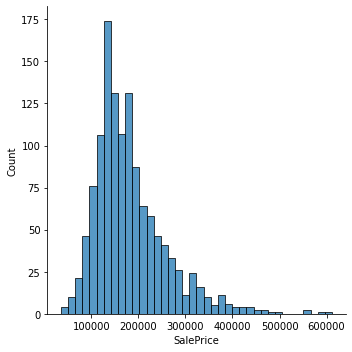

In [53]:
# checking our traget variable 'SalePrice'
sns.displot(housing['SalePrice'])
plt.show()

In [54]:
num_col = num_var.columns
len(num_col)

35

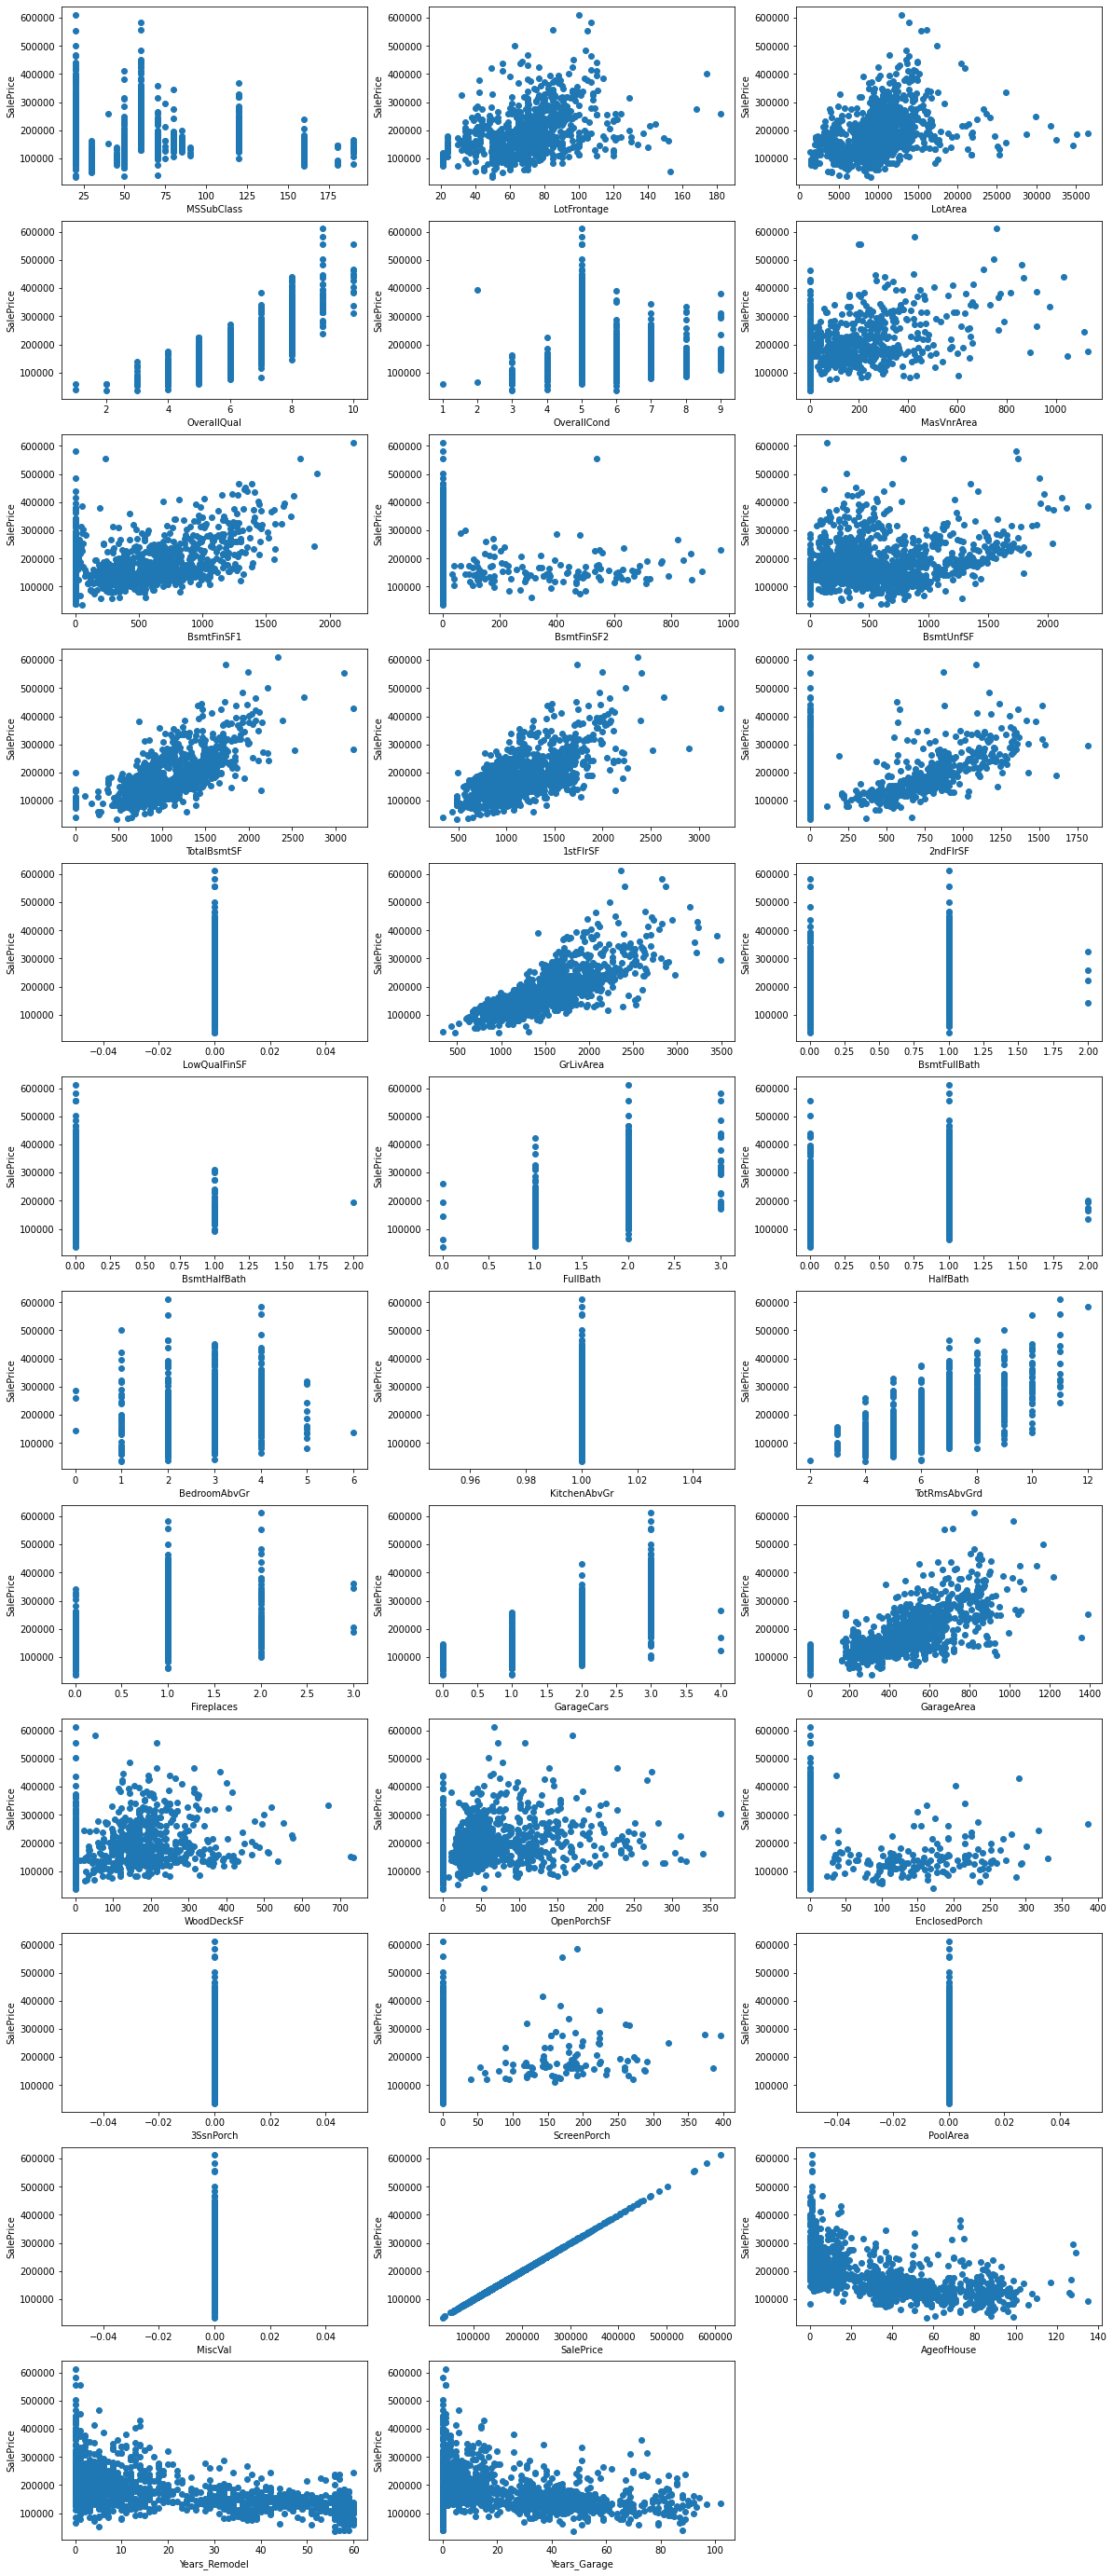

In [55]:
# let's visualize numeric variables

plt.figure(figsize=(20,50))
i = 1
for x in num_col:
    plt.subplot(12,3,i)
    plt.scatter(data=housing, x=x, y='SalePrice')
    plt.xlabel(str(x))
    plt.ylabel("SalePrice")
    i += 1
plt.show()

In [56]:
housing['LowQualFinSF'].value_counts()

0    1266
Name: LowQualFinSF, dtype: int64

In [57]:
housing['KitchenAbvGr'].value_counts()

1    1266
Name: KitchenAbvGr, dtype: int64

In [58]:
housing['3SsnPorch'].value_counts()

0    1266
Name: 3SsnPorch, dtype: int64

In [59]:
housing['PoolArea'].value_counts()

0    1266
Name: PoolArea, dtype: int64

In [60]:
housing['MiscVal'].value_counts()

0    1266
Name: MiscVal, dtype: int64

In [61]:
# from the above plot, we can see that some variables do not make any sense as they have only single value presnet in all the entities.
housing.drop(['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

In [62]:
# check shape
housing.shape

(1266, 69)

In [63]:
# checking categorical variables
cat_var = housing.select_dtypes(include=['object']).columns
cat_var

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [64]:
len(cat_var)

38

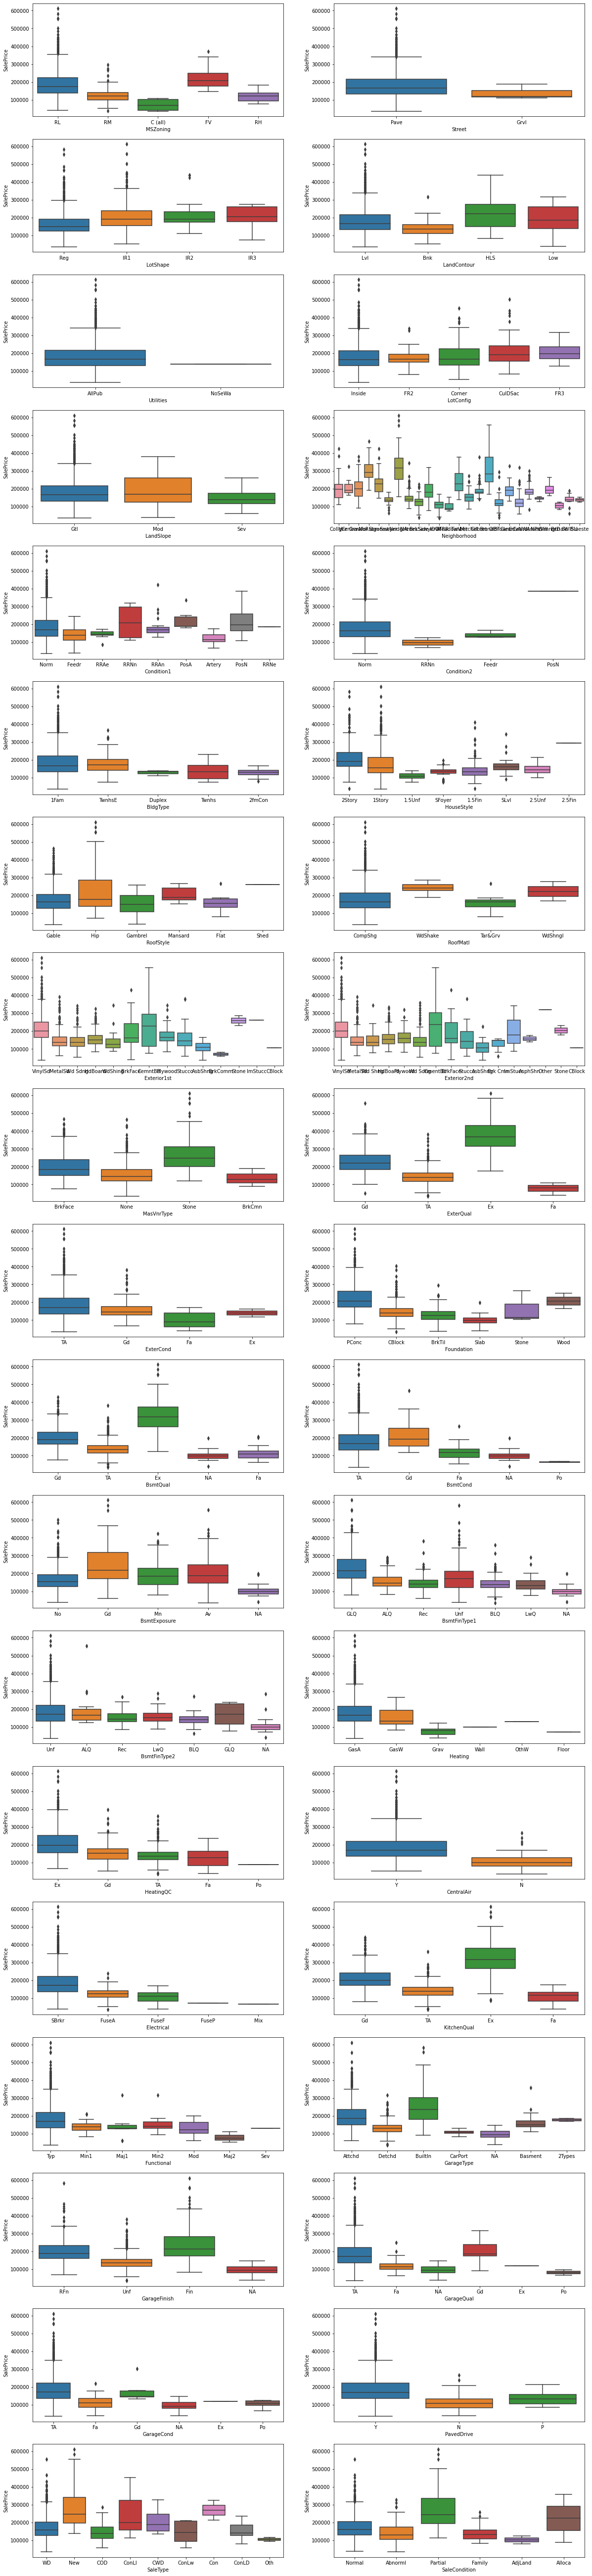

In [65]:
# Lets's visualize categorical variables
plt.figure(figsize=(20,100))
i = 1
for x in cat_var:
    plt.subplot(20,2,i)
    sns.boxplot(data=housing, x=x, y='SalePrice')
    i += 1
plt.show()

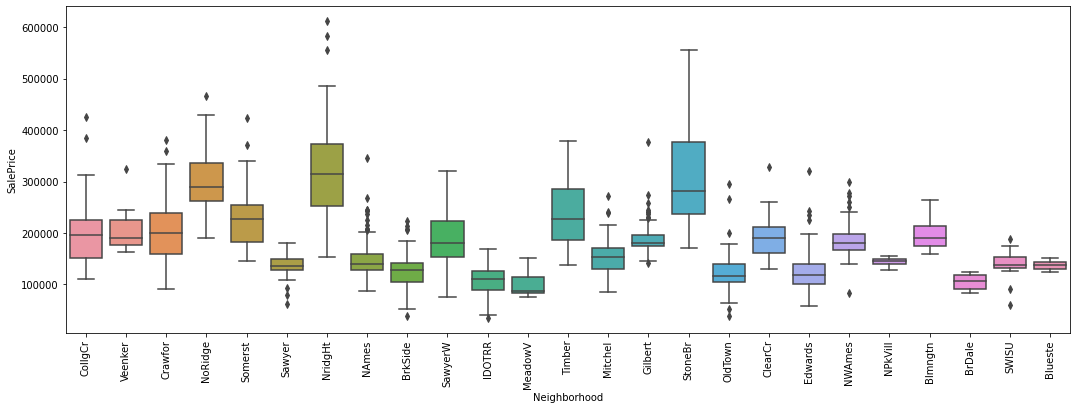

In [66]:
# to get better visual for some variables
plt.figure(figsize=(18,6))
sns.boxplot(data=housing, x='Neighborhood', y='SalePrice')
plt.xticks(rotation='vertical')
plt.show()

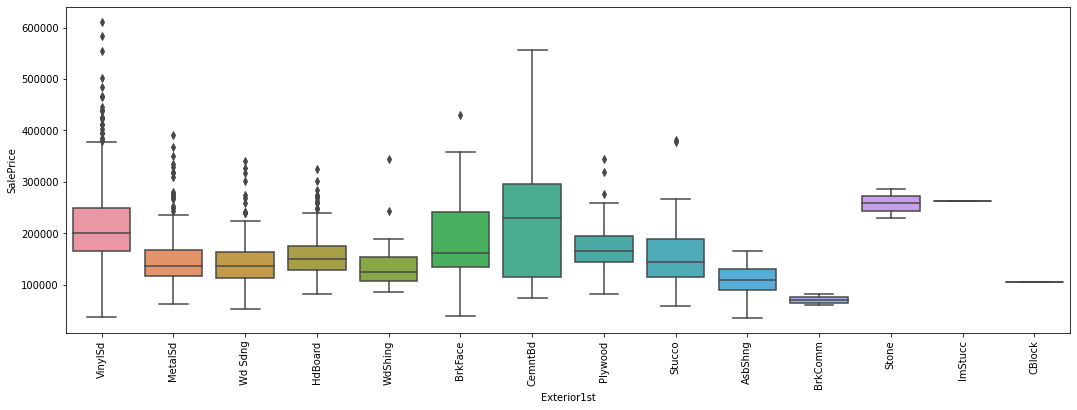

In [67]:
plt.figure(figsize=(18,6))
sns.boxplot(data=housing, x='Exterior1st', y='SalePrice')
plt.xticks(rotation='vertical')
plt.show()

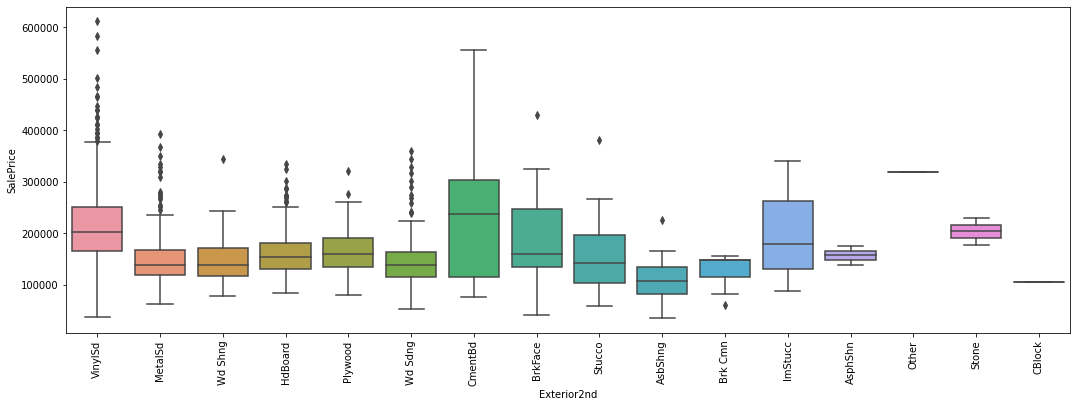

In [68]:
plt.figure(figsize=(18,6))
sns.boxplot(data=housing, x='Exterior2nd', y='SalePrice')
plt.xticks(rotation='vertical')
plt.show()

In [69]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice,AgeofHouse,Years_Remodel,Years_Garage
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,WD,Normal,208500,5,5,5.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,WD,Normal,181500,31,31,31.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,WD,Normal,223500,7,6,7.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,WD,Abnorml,140000,91,36,8.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,WD,Normal,250000,8,8,8.0


In [70]:
num_var.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'AgeofHouse', 'Years_Remodel', 'Years_Garage'],
      dtype='object')

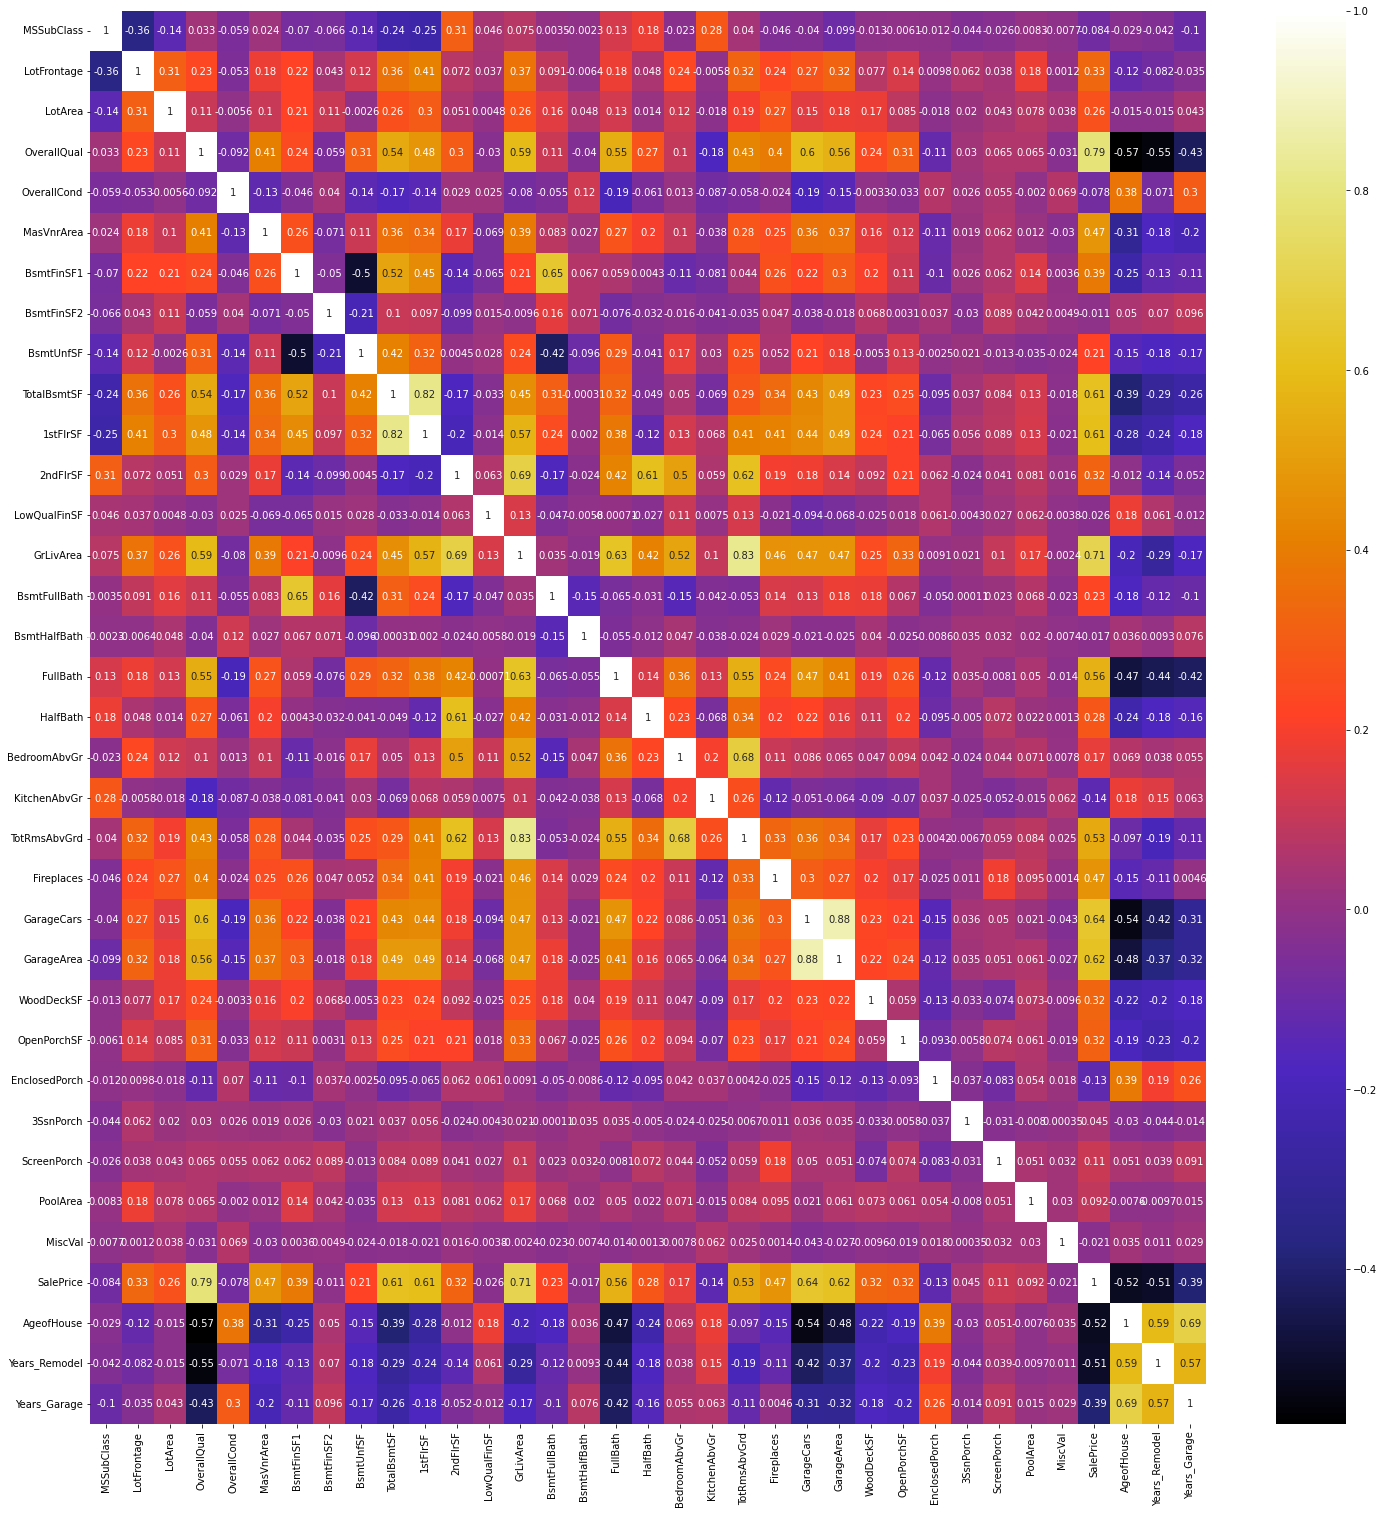

In [71]:
# Let's find out correlation between independent variables and also correlation with respect to our target variable
plt.figure(figsize=(25,26))
sns.heatmap(num_var.corr(), annot=True, cmap='CMRmap')
plt.show()

- We can see some variables that are highly correlated with the target variable 'SalePrice' are OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF. 
- TotRmsAbvGrd and GrLivArea are highly correlated with a correlation of 0.83.
- TotalBsmtSF and 1stFlrSF are correlated with a correlation of 0.82.
- AgeofHouse and OverallQual are negatively correlated with correlation -0.57.

### 4. Data Preparation

#### Encoding

In [72]:
# get the dummy varibales for the features
dummy1 = pd.get_dummies(housing[cat_var], drop_first=True)
dummy1.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,

In [73]:
# let's concat dummy variables with our original dataframe
housing = pd.concat([housing, dummy1], axis=1)
housing.shape

(1266, 264)

In [74]:
# let's drop duplicate columns as we already have their dummy variables.
housing = housing.drop(cat_var, axis=1)
housing.shape

(1266, 226)

#### Spitting the Data into Training and Testing Sets

In [75]:
df_train, df_test = train_test_split(housing, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(886, 226)
(380, 226)


#### Rescalling the Features

In [76]:
num_var = housing.select_dtypes(include=['int64', 'int32', 'float64', 'float32']).columns
num_var

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'AgeofHouse',
       'Years_Remodel', 'Years_Garage'],
      dtype='object')

In [77]:
# let's rescale the features using MinMaxScaler
scaler = MinMaxScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.transform(df_test[num_var])

In [78]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,AgeofHouse,Years_Remodel,Years_Garage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
686,0.235294,0.391304,0.253040,0.666667,0.571429,0.000000,0.000000,0.0,0.374144,0.272614,0.186593,0.55059,0.458400,0.0,0.0,1.000000,0.0,0.5,0.0,0.5,0.000000,0.50,0.426254,0.195652,0.288462,0.000000,0.0,0.331107,0.000000,0.000000,0.000000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [79]:
df_train[num_var].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,AgeofHouse,Years_Remodel,Years_Garage
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.0,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,0.205086,0.298886,0.237373,0.575245,0.508384,0.097797,0.203996,0.040692,0.244705,0.329858,0.280733,0.212199,0.370798,0.212754,0.055305,0.517682,0.198646,0.471595,0.0,0.440858,0.205418,0.446670,0.351044,0.123503,0.123388,0.054664,0.039478,0.252614,0.264345,0.366008,0.290359
std,0.242264,0.128673,0.119473,0.151401,0.152193,0.161548,0.197313,0.140748,0.187612,0.126767,0.131066,0.264535,0.157165,0.251876,0.228703,0.180328,0.247104,0.122649,0.0,0.150633,0.208882,0.180372,0.150588,0.162705,0.165532,0.154896,0.139998,0.133144,0.224876,0.339750,0.260982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.242236,0.170980,0.444444,0.428571,0.000000,0.000000,0.000000,0.100813,0.250468,0.183569,0.000000,0.252008,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.300000,0.000000,0.250000,0.247788,0.000000,0.000000,0.000000,0.000000,0.164007,0.046512,0.066667,0.043011
50%,0.176471,0.304658,0.227699,0.555556,0.428571,0.000000,0.182358,0.000000,0.205265,0.308952,0.255529,0.000000,0.352875,0.000000,0.000000,0.666667,0.000000,0.500000,0.0,0.400000,0.333333,0.500000,0.349926,0.000000,0.074176,0.000000,0.000000,0.225217,0.248062,0.216667,0.241935
75%,0.235294,0.360248,0.290987,0.666667,0.571429,0.155447,0.334895,0.000000,0.344820,0.394729,0.348825,0.451893,0.455509,0.500000,0.000000,0.666667,0.500000,0.500000,0.0,0.500000,0.333333,0.500000,0.425516,0.228261,0.178571,0.000000,0.000000,0.309974,0.403101,0.650000,0.483871
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X & Y Sets for Model Building

In [80]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [81]:
y_train.head()

686     0.331107
933     0.265095
1217    0.333863
485     0.190150
1303    0.338297
Name: SalePrice, dtype: float64

### 5. Model Building

#### 5.1 Linear Regression Model

In [82]:
# Let's try predicting the Sale Price using linear regression

In [83]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [84]:
# Print the intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-111166572151.46002
[-6.41264749e-02  2.19136939e-02  5.44040495e-02  7.00558934e-02
  7.18865324e-02  2.28536289e-02 -2.59886784e+10 -1.15452447e+10
 -2.77465963e+10  3.80803029e+10 -2.56991664e+10 -1.43059285e+10
  2.76439202e+10 -3.09539206e-03 -8.04922654e-04  2.12637533e-02
  1.46965371e-02 -4.46787198e-02  1.18556159e+11  3.11525511e-02
  9.69796274e-03  2.76399634e-02  5.82497361e-02  8.61538582e-03
  1.38144297e-02  2.15113135e-02  3.47687120e-02 -6.88305930e-02
 -1.39671483e-02  2.35916423e-02  3.55467868e-02  4.48474690e-02
  3.55477677e-02  2.71072388e-02 -4.26353216e-02  1.12161636e-02
 -8.33332539e-03  4.18090820e-03  1.23796463e-02 -8.13627243e-03
  5.78403473e-03 -8.45241547e-02  9.23156738e-03 -1.76434517e-02
 -4.65917587e-03 -4.51660156e-03  3.12882662e-03 -3.29557955e-02
  1.57787800e-02  1.33509636e-02  3.91578674e-03 -9.73796844e-03
 -7.74383545e-03  2.67868042e-02 -2.18348503e-02 -1.00841522e-02
 -1.32923126e-02 -3.50952148e-03 -2.81438828e-02 -2.33617648e-02
  2.5

In [85]:
# predict
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# Model evaluation
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score for train (Linear Regression): ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test (Linear Regression): ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train (Linear Regression): ",rss1_lr)
metric.append(rss1_lr)


rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test (Linear Regression): ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for train (Linear Regression): ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test (Linear Regression): ",mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 score for train (Linear Regression):  0.9503111403472251
R2 score for test (Linear Regression):  -1.311452881183249e+21
RSS for train (Linear Regression):  0.7795535678606593
RSS for test (Linear Regression):  8.383185099202249e+21
MSE for train (Linear Regression):  0.0008798573000684643
MSE for test (Linear Regression):  2.2061013418953286e+19


##### If we check the r2 score for both train and test data, we can clearly see the overfitting issue.

#### 5.2 Ridge Rigression Model

In [86]:
# list of alphas to tune
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
# fit
model_cv_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# Printing the best hyperparameter alpha
print(model_cv_ridge.best_params_)

{'alpha': 3.0}


In [88]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
ridge = Ridge(alpha=3)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.19304821e-02  2.07240061e-02  3.36972058e-02  6.95464062e-02
  4.68092636e-02  3.18330889e-02  7.21047136e-02  8.46235480e-03
  3.41950163e-02  7.66906052e-02  9.05452506e-02  4.97677220e-02
  1.09930535e-01  4.83590196e-03  1.02857454e-03  2.89481596e-02
  1.96599917e-02 -1.33249866e-02  0.00000000e+00  4.98970240e-02
  2.11164902e-02  3.28114244e-02  4.98174732e-02  1.01755863e-02
  1.69850225e-02  1.62441451e-02  2.41737574e-02 -2.99266597e-02
 -2.32359647e-02  1.30990096e-02  5.85253139e-03  7.17092919e-03
  7.67402541e-03 -3.97332559e-03 -4.10770349e-03  1.09316117e-02
 -5.37173555e-04  2.01760646e-03  1.19255250e-02 -8.35972267e-03
  5.37307930e-03 -1.44326240e-02  1.10234637e-02 -1.80472026e-02
 -2.79915498e-03 -4.65313774e-03  4.66898063e-03 -1.30938757e-02
  3.32878456e-03  7.71789529e-03  1.86532971e-03 -7.78572929e-03
 -1.02384793e-02  2.64568018e-02 -2.07595343e-02 -1.93686601e-02
 -1.37866724e-02 -1.01898271e-02 -2.75491325e-02 -1.96666906e-02
  1.04725542e-02 -1.60013

In [89]:
# Let's now evaluate our model.

In [90]:
# predict
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Model evaluation
metric2 = []
r2_train_rr = r2_score(y_train, y_pred_train)
print("R2 score for train (Ridge Regression): ",r2_train_rr)
metric2.append(r2_train_rr)

r2_test_rr = r2_score(y_test, y_pred_test)
print("R2 score for test (Ridge Regression): ",r2_test_rr)
metric2.append(r2_test_rr)

rss1_rr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train (Ridge Regression): ",rss1_rr)
metric2.append(rss1_rr)


rss2_rr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test (Ridge Regression): ",rss2_rr)
metric2.append(rss2_rr)

mse_train_rr = mean_squared_error(y_train, y_pred_train)
print("MSE for train (Ridge Regression): ",mse_train_rr)
metric2.append(mse_train_rr**0.5)

mse_test_rr = mean_squared_error(y_test, y_pred_test)
print("MSE for train (Ridge Regression): ",mse_test_rr)
metric2.append(mse_test_rr**0.5)

R2 score for train (Ridge Regression):  0.9444948144771387
R2 score for test (Ridge Regression):  0.9034573441008638
RSS for train (Ridge Regression):  0.8708041543210973
RSS for test (Ridge Regression):  0.6171285038017011
MSE for train (Ridge Regression):  0.000982848932642322
MSE for train (Ridge Regression):  0.0016240223784255293


In [91]:
betas_ridge = pd.DataFrame(index=X_train.columns)
betas_ridge.row = X_train.columns
betas_ridge['Coefficients'] = ridge.coef_
betas_ridge.sort_values(by=['Coefficients'], ascending=False).head(10)

,Coefficients
GrLivArea,0.109931
1stFlrSF,0.090545
TotalBsmtSF,0.076691
BsmtFinSF1,0.072105
OverallQual,0.069546
Neighborhood_StoneBr,0.059566
TotRmsAbvGrd,0.049897
GarageArea,0.049817
2ndFlrSF,0.049768
OverallCond,0.046809


#### 5.3 Lasso Rigression Model

In [92]:
# list of alphas to tune
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
# fit
model_cv_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 0.0001}


In [94]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

lasso = Lasso(alpha=0.0001)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [95]:
lasso.coef_

array([-2.17361089e-02,  1.38256939e-02,  3.22992057e-02,  8.69599263e-02,
        5.88998545e-02,  2.59732360e-02,  5.07399200e-02,  0.00000000e+00,
        0.00000000e+00,  1.26402889e-01,  1.67447202e-03,  0.00000000e+00,
        2.84569294e-01,  2.85164708e-03, -0.00000000e+00,  2.27114832e-03,
        1.00008381e-02, -1.21293579e-02,  0.00000000e+00,  3.10791056e-02,
        1.39568790e-02,  2.46241833e-02,  4.38515335e-02,  1.68028934e-03,
        1.15740176e-02,  7.22010275e-03,  2.33524214e-02, -4.38906938e-02,
       -1.85253321e-02,  1.39297971e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.10904090e-02, -0.00000000e+00,  4.91181845e-03,
       -0.00000000e+00,  6.14809451e-04,  8.76154130e-03, -2.19426529e-03,
        3.90714265e-03, -0.00000000e+00,  9.31849843e-03, -1.04042776e-02,
       -0.00000000e+00, -2.00253132e-03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.72087686e-03,  7.50327206e-03, -0.00000000e+00,
       -9.21250934e-04,  

In [96]:
# predict
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Model evaluation
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score for train (Lasso Regression): ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test (Lasso Regression): ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train (Lasso Regression): ",rss1_lr)
metric3.append(rss1_lr)


rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test (Lasso Regression): ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for train (Lasso Regression): ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for train (Lasso Regression): ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 score for train (Lasso Regression):  0.942484489989883
R2 score for test (Lasso Regression):  0.9067510937020119
RSS for train (Lasso Regression):  0.9023435303009254
RSS for test (Lasso Regression):  0.59607390628392
MSE for train (Lasso Regression):  0.0010184464224615411
MSE for train (Lasso Regression):  0.001568615542852421


In [97]:
betas_lasso = pd.DataFrame(index=X_train.columns)
betas_lasso.row = X_train.columns
betas_lasso['Coefficient'] = lasso.coef_
betas_lasso['Absolute Coefficient'] = abs(lasso.coef_)
betas_lasso.sort_values(by=['Absolute Coefficient'], ascending=False).head(10)

,Coefficient,Absolute Coefficient
GrLivArea,0.284569,0.284569
TotalBsmtSF,0.126403,0.126403
OverallQual,0.086960,0.086960
Neighborhood_StoneBr,0.068342,0.068342
OverallCond,0.058900,0.058900
BsmtFinSF1,0.050740,0.050740
Neighborhood_NoRidge,0.044802,0.044802
AgeofHouse,-0.043891,0.043891
GarageArea,0.043852,0.043852
RoofMatl_Tar&Grv,-0.042862,0.042862


### 6. Model Evaluation

In [98]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.503111e-01,0.944495,0.942484
1,R2 Score (Test),-1.311453e+21,0.903457,0.906751
2,RSS (Train),7.795536e-01,0.870804,0.902344
3,RSS (Test),8.383185e+21,0.617129,0.596074
4,MSE (Train),2.966239e-02,0.031350,0.031913
5,MSE (Test),4.696915e+09,0.040299,0.039606


##### From the above table, we can clearly see that R2 is better in Lasso than Ridge. So we can select Lasso Regression.

In [99]:
# check top 10 important features
print("Top 10 features: ")
betas_lasso = pd.DataFrame(index=X_train.columns)
betas_lasso.row = X_train.columns
betas_lasso['Coefficient'] = lasso.coef_
betas_lasso['Absolute Coefficient'] = abs(lasso.coef_)
betas_lasso.sort_values(by=['Absolute Coefficient'], ascending=False).head(10)

Top 10 features: 


,Coefficient,Absolute Coefficient
GrLivArea,0.284569,0.284569
TotalBsmtSF,0.126403,0.126403
OverallQual,0.086960,0.086960
Neighborhood_StoneBr,0.068342,0.068342
OverallCond,0.058900,0.058900
BsmtFinSF1,0.050740,0.050740
Neighborhood_NoRidge,0.044802,0.044802
AgeofHouse,-0.043891,0.043891
GarageArea,0.043852,0.043852
RoofMatl_Tar&Grv,-0.042862,0.042862


## Subjective Questions

#### Q1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Ans.

- For Ridge Regression, optimal value of alpha = 3.0
- For Lasso Regression, optimal value of alpha = 0.0001

In [100]:
# If we double the value of alpha for ridge regression, i.e. alpha = 6
ridge = Ridge(alpha=6)
ridge.fit(X_train, y_train)

Ridge(alpha=6)

In [101]:
# predict
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Model evaluation
r2_train_rr = r2_score(y_train, y_pred_train)
print("R2 score for train (Ridge Regression): ",r2_train_rr)

r2_test_rr = r2_score(y_test, y_pred_test)
print("R2 score for test (Ridge Regression): ",r2_test_rr)


R2 score for train (Ridge Regression):  0.9397199274145321
R2 score for test (Ridge Regression):  0.9022386007847552


In [102]:
# If we double the value of alpha for lasso regression, i.e. alpha = 0.0002
lasso = Lasso(alpha=0.0002)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [103]:
# predict
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Model evaluation
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score for train (Lasso Regression): ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test (Lasso Regression): ",r2_test_lr)

R2 score for train (Lasso Regression):  0.9371254870259446
R2 score for test (Lasso Regression):  0.9075438768209891


In [104]:
print("Top 10 features: ")
betas_lasso = pd.DataFrame(index=X_train.columns)
betas_lasso.row = X_train.columns
betas_lasso['Coefficient'] = lasso.coef_
betas_lasso['Absolute Coefficient'] = abs(lasso.coef_)
betas_lasso.sort_values(by=['Absolute Coefficient'], ascending=False).head(10)

Top 10 features: 


,Coefficient,Absolute Coefficient
GrLivArea,0.284801,0.284801
TotalBsmtSF,0.125282,0.125282
OverallQual,0.097735,0.097735
Neighborhood_StoneBr,0.060127,0.060127
BsmtFinSF1,0.051423,0.051423
GarageArea,0.048385,0.048385
OverallCond,0.048207,0.048207
Neighborhood_NoRidge,0.041817,0.041817
ExterQual_TA,-0.037018,0.037018
Functional_Typ,0.034734,0.034734


So, our top 10 features are `GrLivArea`, `TotalBsmtSF`, `OverallQual`, `Neighborhood_StoneBr`, `BsmtFinSF1`, `GarageArea`, `OverallCond`, `Neighborhood_NoRidge`, `ExterQual_TA` and `Functional_Typ`.

#### Q2. You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

#### Ans. 

In ridge regression, using optimal value of alpha, R2 score for train = 0.944495 and R2 score for test = 0.903457


In lasso regression, using optimal value of alpha, R2 score for train = 0.942484 and R2 score for test = 0.906751

Now, as the R2 score is better in case Lasso than ridge, we will choose lasso regression.

#### Q3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Ans.
Following are the top 5 important features before dropping:
1. GrLivArea
1. TotalBsmtSF
3. OverallQual 
4. Neighborhood_StoneBr
5. OverallCond

In [105]:
X_train_2nd = X_train.drop(['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'Neighborhood_StoneBr', 'OverallCond'], axis=1)
X_test_2nd = X_test.drop(['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'Neighborhood_StoneBr', 'OverallCond'], axis=1)

In [111]:
# Lasso Regression

In [112]:
# list of alphas to tune
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
folds = 5
model_cv_lasso_2nd = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
# fit
model_cv_lasso_2nd.fit(X_train_2nd, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [113]:
# Printing the best hyperparameter alpha
print(model_cv_lasso_2nd.best_params_)

{'alpha': 0.0001}


In [114]:
# fitting
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_2nd, y_train)

Lasso(alpha=0.0001)

In [115]:
# Evaluation
y_pred_train = lasso.predict(X_train_2nd)
y_pred_test = lasso.predict(X_test_2nd)

print('R2 Train: ', r2_score(y_train, y_pred_train))
print('R2 Test: ', r2_score(y_test, y_pred_test))

print('RMSE Train: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE Test: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 Train:  0.9356030936668464
R2 Test:  0.8861701562076297
RMSE Train:  0.03376829303794521
RMSE Test:  0.043758704253727375


In [116]:
print(lasso.coef_)

[-2.38340841e-02  2.15742307e-02  1.39036348e-02  3.59072124e-02
  1.30967702e-01  3.13146717e-02  8.17549155e-02  2.91920285e-01
  1.41122613e-01  1.04212665e-03 -0.00000000e+00  4.05451422e-03
  1.02019541e-02 -1.75236792e-02  0.00000000e+00  4.39904654e-02
  1.39432718e-02  2.05732975e-02  5.53399280e-02  3.91244656e-03
  1.15606982e-02  8.67437868e-03  2.35006990e-02 -3.05153938e-02
 -3.15887255e-02  8.82150488e-03  0.00000000e+00  0.00000000e+00
  3.23613083e-03 -1.12431976e-02 -0.00000000e+00  5.14837444e-03
 -0.00000000e+00  0.00000000e+00  1.03531547e-02 -0.00000000e+00
  1.40065015e-03 -0.00000000e+00  1.39328411e-02 -1.09419602e-02
  0.00000000e+00 -4.47438610e-03  6.59470482e-04 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.08484876e-03 -4.31695155e-03
 -1.45066207e-02  2.75905386e-02 -2.64565577e-02 -2.13803573e-02
 -8.97847829e-03 -1.94325825e-02 -3.72449765e-02 -1.96194546e-02
  0.00000000e+00 -1.25081878e-02  2.98299284e-02  1.72021221e-02
 -7.69660028e-03 -0.00000

In [118]:
# top 5 features after dropping 
betas_lasso_2nd = pd.DataFrame(index=X_train_2nd.columns)
betas_lasso_2nd.row = X_train_2nd.columns
betas_lasso_2nd['Coefficient'] = lasso.coef_
betas_lasso_2nd['Absolute Coefficient'] = abs(lasso.coef_)
betas_lasso_2nd.sort_values(by=['Absolute Coefficient'], ascending=False).head()

,Coefficient,Absolute Coefficient
1stFlrSF,0.291920,0.291920
2ndFlrSF,0.141123,0.141123
BsmtFinSF1,0.130968,0.130968
BsmtUnfSF,0.081755,0.081755
GarageArea,0.055340,0.055340


Now following are the top 5 important features after dropping:
1. 1stFlrSF
2. 2ndFlrSF
3. BsmtFinSF1
4. BsmtUnfSF
5. GarageArea

#### Q4. How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Ans. Explained in pdf file